https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/

https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/

1.问题描述
在本教程中我们将要研究的问题是波士顿房价数据集。

您可以下载此数据集并将其直接保存到您当前的工作中，文件名为housing.csv（更新：从这里下载数据）。

该数据集描述了波士顿郊区房屋的 13 个数值属性，并致力于对这些郊区房屋的价格进行建模（以千美元为单位）。因此，这是一个回归预测建模问题。输入属性包括犯罪率、非零售商业用地面积比例、化学物质浓度等。

这是机器学习中一个研究得很好的问题。它使用起来很方便，因为所有输入和输出属性都是数字，并且有 506 个实例可供使用。

使用均方误差 (MSE) 评估的模型的合理性能约为 20 千美元的平方（如果取平方根则为 4,500 美元）。这是我们神经网络模型的一个不错目标。

In [1]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [2]:
# load dataset
dataframe = pd.read_csv("../data/housing.csv", delim_whitespace=True, header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:13]
Y = dataset[:,13]

C:\Users\Administrator\AppData\Local\Temp\ipykernel_27844\1516238202.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv("../data/housing.csv", delim_whitespace=True, header=None)


In [3]:
...
# define base model


def baseline_model():
 # create model
 model = Sequential()
 model.add(Dense(13, input_shape=(13,),
           kernel_initializer='normal', activation='relu'))
 model.add(Dense(1, kernel_initializer='normal'))
 # Compile model
 model.compile(loss='mean_squared_error', optimizer='adam')
 return model


In [5]:
# evaluate model
estimator = KerasRegressor(
    model=baseline_model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, Y, cv=kfold,
                          scoring='neg_mean_squared_error')
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))


d:\ProgramData\anaconda3\envs\ai\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
d:\ProgramData\anaconda3\envs\ai\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
d:\ProgramData\anaconda3\envs\ai\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activi

Baseline: -31.25 (19.28) MSE


In [6]:
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(
    model=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, Y, cv=kfold,
                          scoring='neg_mean_squared_error')
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))


d:\ProgramData\anaconda3\envs\ai\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
d:\ProgramData\anaconda3\envs\ai\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
d:\ProgramData\anaconda3\envs\ai\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activi

Standardized: -28.97 (30.06) MSE


## 在 Keras 中可视化模型训练历史

https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

d:\ProgramData\anaconda3\envs\ai\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


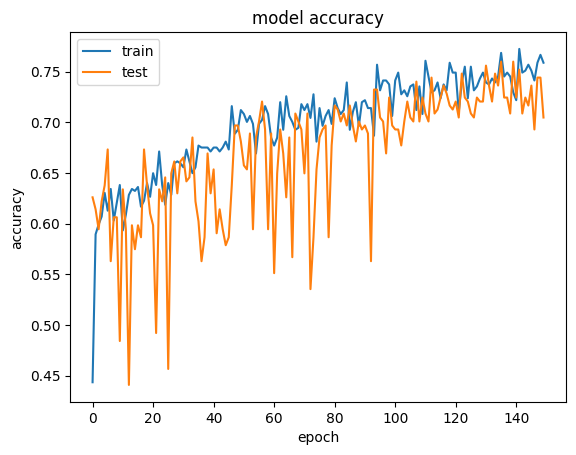

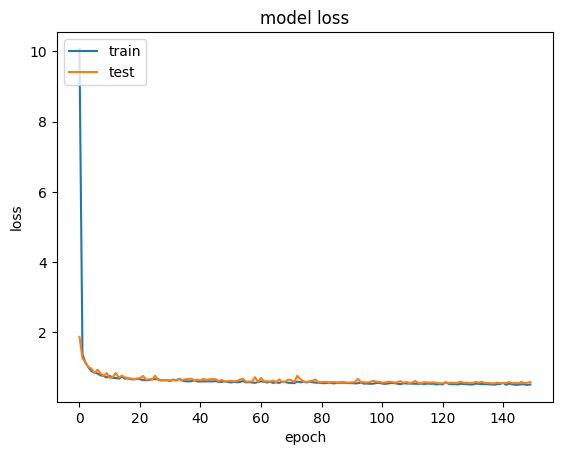

In [7]:

# Visualize training history
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
# load pima indians dataset
dataset = np.loadtxt("../data/pima-indians-diabetes.data.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:, 0:8]
Y = dataset[:, 8]
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X, Y, validation_split=0.33,
                    epochs=150, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
